In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from utils.model_operations import *
from utils.image_operations import *

directory_path = os.getcwd()

In [2]:
def loadModelWeights(setName, percentage=1):
    """
    setname: either "train" or "test"
    
    returns dataframe with the weights of all models by layers
    """
    bias = ['0.02', '0.03', '0.04', '0.05']
    df = pd.DataFrame()
    modelId = 0
    for b in bias:
        if setName == "train":
            model_data = ModelDataset(bias=b, data_directory=directory_path+'/data/DigitWdb/train')
        elif setName == "test":
            model_data = ModelDataset(bias=b, data_directory=directory_path+'/data/DigitWdb/test')
        else:
            raise "set name must either be train or test"
            
        for modelNumber in tqdm(range(len(model_data)//percentage), desc="loading model weights with bias "+b):
            model = model_data[modelNumber]
            layerNumber = 0
            for layer in model.layers:
                if len(layer.get_weights()) != 0:
                    # weights
                    weights = layer.get_weights()[0]
                    # biases
                    biases = layer.get_weights()[1]

                    df = df.append({'modelId':modelId,'weights':np.ravel(weights),'biases':np.ravel(biases),'layer':layerNumber, 'bias':b}, ignore_index=True)
                    layerNumber = layerNumber + 1
            modelId += 1       
    return df


In [206]:
trainModelWeights = loadModelWeights("train", percentage = 1)
testModelWeights = loadModelWeights("test",  percentage = 1)

loading model weights with bias 0.05: 100%|██████████| 500/500 [03:12<00:00,  2.60it/s]


In [207]:
trainModelWeights

,modelId,weights,biases,layer,bias
0,0.0,"[-0.018486138, -0.03354981, -0.16535422, -0.06...","[-0.24564764, -0.081536554, -0.01958792, -0.11...",0.0,0.02
1,0.0,"[-0.26035, -0.031969644, 0.02034611, 0.0241116...","[-0.08751261, 0.14474091, -0.26124775, -0.2221...",1.0,0.02
2,0.0,"[-0.045246184, -0.022445709, -0.17450637, -0.0...","[0.18726698, -0.055855844, 0.10226409, -0.1979...",2.0,0.02
3,0.0,"[0.14023237, -0.0014608316, 0.17644557, 0.1682...","[-0.11819455, 0.109577455, -0.034734905, 0.126...",3.0,0.02
4,0.0,"[-0.25628987, 0.017059373, -0.14892107, 0.1850...","[0.04371279, 0.1927553, -0.0704351, 0.02792670...",4.0,0.02
...,...,...,...,...,...
39995,7999.0,"[-0.057432093, 0.012581817, 0.11414536, 0.0184...","[-0.0671344, -0.0277758, -0.0146967145, 0.0630...",0.0,0.05
39996,7999.0,"[-0.107280254, -0.09203529, -0.07334799, -0.10...","[-0.03721022, 0.040936325, -0.030625928, 0.002...",1.0,0.05
39997,7999.0,"[0.011979358, -0.034554373, -0.051180247, -0.0...","[0.010443132, -0.18427786, -0.066259846, -0.03...",2.0,0.05
39998,7999.0,"[-2.1241395, 0.58485734, -2.2942114, 0.4497387...","[3.359927, 1.6769673, 2.8587103, 2.1773515, 2....",3.0,0.05


In [208]:
from sklearn.model_selection import train_test_split


def train_test(trainModelWeights, testModelWeights = None, feature='weights', labels='one'):

    train_dataset = []
    train_labels = []
    test_dataset = []
    test_labels = []
    
    train_ids = list(range(0, int(trainModelWeights['modelId'].max() + 1)))
    if testModelWeights is not None : 
        test_ids = list(range(0, int(testModelWeights['modelId'].max() + 1)))
    else : 
        train_ids, test_ids = train_test_split(train_ids, test_size=0.2)
    

    for modelid in train_ids :

        X_train = trainModelWeights[trainModelWeights['modelId'] == modelid][[feature]].values[:,0]
        if labels == 'one' :
            y_train = float(trainModelWeights[trainModelWeights['modelId'] == modelid][['bias']].values[:,0][0])
        else : 
            y_train = [float(b) for b in trainModelWeights[trainModelWeights['modelId'] == modelid][['bias']].values[:,0]]

        layers = []
        for i, layer in enumerate(X_train) : 
            # TO DO : CNN feature reduction 
            layer = np.random.choice(layer, size=100, replace=False) 
            layers.append(layer)
        train_dataset.append(layers)
        train_labels.append(y_train)
        

    for modelid in test_ids : 

        if testModelWeights is not None : 
            X_test = testModelWeights[testModelWeights['modelId'] == modelid][[feature]].values[:,0]
            if labels == 'one' :
                y_test = float(testModelWeights[testModelWeights['modelId'] == modelid][['bias']].values[:,0][0])
            else : 
                y_test = [float(b) for b in testModelWeights[testModelWeights['modelId'] == modelid][['bias']].values[:,0]]
        else : 
            X_test = trainModelWeights[trainModelWeights['modelId'] == modelid][[feature]].values[:,0]
            if labels == 'one' :
                y_test = float(trainModelWeights[trainModelWeights['modelId'] == modelid][['bias']].values[:,0][0])
            else : 
                y_test = [float(b) for b in trainModelWeights[trainModelWeights['modelId'] == modelid][['bias']].values[:,0]]
        
        layers = []
        for i, layer in enumerate(X_test) : 
            # TO DO : CNN feature reduction 
            layer = np.random.choice(layer, size=100, replace=False) 
            layers.append(layer)
        test_dataset.append(layers)
        test_labels.append(y_test)


    # most important : dataset
    train_labels = np.array(train_labels)
    # train_labels = train_labels.reshape((train_labels.shape[0], 1, 1))

    test_labels = np.array(test_labels)
    # test_labels = test_labels.reshape((test_labels.shape[0], 1, 1))
    
    return np.array(train_dataset), np.array(train_labels), train_ids, np.array(test_dataset),  np.array(test_labels), test_ids

In [209]:
X_train, y_train, train_ids, X_test, y_test, test_ids = train_test(trainModelWeights, feature='weights')

In [210]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6400, 5, 100), (6400,), (1600, 5, 100), (1600,))

In [211]:
# very basic iterator

def batcher(X_dataset, y_dataset, batch_size=8):

    num_rows = X_dataset.shape[0]

    start = 0
    end = batch_size
    while end <= num_rows : 
        batch = torch.Tensor(X_dataset[start:end, :, :])
        labels = torch.Tensor(y_dataset[start:end])
        yield (batch, labels)
        start = end
        end += batch_size

In [212]:
# other resources to continue : 
# https://stackoverflow.com/questions/58251677/how-do-i-train-an-lstm-in-pytorch

class Model(nn.Module):
    # source : https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html#torch.nn.LSTM 
    # * = to be experimented with
    
    def __init__(self):
        super(Model, self).__init__()
        
        # input_size – The number of expected features in the input x
        # hidden_size – The number of features in the hidden state h
        # num_layers – Number of recurrent layers
        # batch_first – If True, then the input and output tensors are provided as (batch, seq, feature)
        # bidirectional – If True, becomes a bidirectional LSTM, let's not get too complicated at first
        self.lstm = nn.LSTM(input_size = 100, hidden_size = 10, num_layers = 1, batch_first = True, bidirectional = False)
        self.dense = nn.Linear(10, 1)

    def forward(self, x):
        # input : (N, L, H_in) 
        # where N = batch size
        #       L = sequence length
        #       H_in = input size
        # -> (batch_size, 5, num_features)
        
        x, (hidden, cell) = self.lstm(x)
        # hidden : final hidden state for each element in the batch, shape (1, 8, 10) -> reshape into (8,1,10)
        hidden = torch.reshape(hidden, shape = (hidden.size()[1], hidden.size()[0], hidden.size()[2])) #?
        
        # x = self.dense(x)
        x = self.dense(hidden)
        
        return torch.reshape(x, shape = (x.size()[0],))


# input size : (batch_size, 5, num_features) - for the 5 layers, and the features extracted
# output size : (batch_size, 1, 1) - for the prediction per model


model = Model()
# y = model(list(batcher(X_train, y_train))[0][0])

In [213]:
from torch import optim
from torch.nn import L1Loss, MSELoss

criterion = MSELoss(reduction='mean')
criterion2 = L1Loss(reduction='mean')
optimizer = optim.RMSprop(model.parameters()) 

# requires_grad=True


acc_loss = []
acc_mae = []
for epoch in tqdm(range(50)):
    epoch_acc_loss = 0.
    epoch_acc_mae = 0.   

    # define dataset to be loadable by batches
    for data in batcher(X_train, y_train, batch_size=8) :
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        
        loss = criterion(outputs, labels)
        loss.backward() 
        optimizer.step()
        
        epoch_acc_loss += loss.item()
        mae = criterion2(outputs, labels)
        epoch_acc_mae += mae.item()
    
    acc_loss.append(epoch_acc_loss)
    acc_mae.append(epoch_acc_mae)

100%|██████████| 50/50 [03:31<00:00,  4.23s/it]


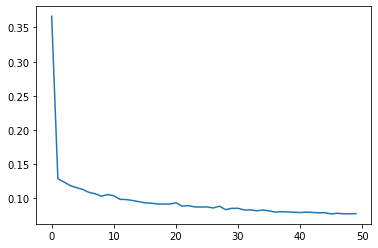

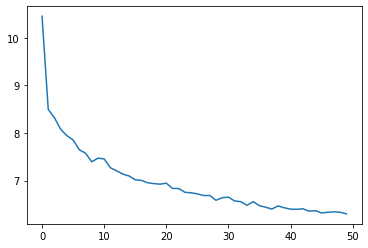

In [214]:
import matplotlib.pyplot as plt

plt.plot(list(range(len(acc_loss))), acc_loss)
plt.show()

plt.plot(list(range(len(acc_mae))), acc_mae)
plt.show()

In [215]:
# test accuracy : 

for data in batcher(X_test, y_test, batch_size=y_test.shape[0]):
    inputs, labels = data
    outputs = model(inputs)
    loss = criterion(outputs, labels)

loss

tensor(0.0003, grad_fn=<MseLossBackward0>)